# Chapter 4 - Interpreting a Fitted Model

Joshua French

To open this information in an interactive Colab notebook, click or scan the QR code below.

<a href="https://colab.research.google.com/github/jfrench/LinearRegression/blob/master/notebooks/04-interpretation-notebook.ipynb"> <img src="https://raw.githubusercontent.com/jfrench/LinearRegression/97ccb66e9f1ed59763573420d728623067e2f0ef/images/qr-interpretation.png"> </a>

------------------------------------------------------------------------

We run the code below to ensure that all necessary packages are installed in our Jupyter environment.

In [ ]:
if(!require(palmerpenguins, quietly = TRUE)) {
  install.packages("palmerpenguins", repos = "https://cran.rstudio.com/")
  library(palmerpenguins)
}

In [ ]:
if(!require(car, quietly = TRUE)) {
  install.packages("car", repos = "https://cran.rstudio.com/")
  library(car)
}

In [ ]:
if(!require(effects, quietly = TRUE)) {
  install.packages("effects", repos = "https://cran.rstudio.com/")
  library(effects)
}

# Interpretation of coefficients

The standard approach to interpreting the coefficients of a fitted linear model is to consider the expected change in the response in relation to changes in the regressors in the model.

Consider the typical multiple linear regression model of the response

$$
Y=\beta_0+\beta_1 X_1 +\ldots + \beta_{p-1}X_{p-1}+\epsilon.
$$

-   We treat the values of our regressor variables as being fixed, known values
-   The error term is treated as a random variable
-   Consequently, the response variable is also a random variable.

## Random Error Assumption

We assume that the errors all have mean 0, conditional on the values of the regressor variables.

$$
E(\epsilon \mid X_1, X_2, \ldots, X_{p-1})=0.
$$ Or, using alternative notation:

$$
E(\epsilon \mid \mathbb{X})=0.
$$

## Expected Value of Response

Using the assumption of mean zero errors, we have:

$$
\begin{aligned}
& E(Y\mid X_1, X_2, \ldots, X_{p-1}) \\
&= E(Y \mid \mathbb{X}) \\
&= E(\beta_0+\beta_1 X_1 +\ldots + \beta_{p-1}X_{p-1}+\epsilon \mid \mathbb{X}) \\
&= E(\beta_0+\beta_1 X_1 +\ldots + \beta_{p-1}X_{p-1}\mid \mathbb{X}) + E(\epsilon \mid \mathbb{X}) \\
&=\beta_0+\beta_1 X_1 +\ldots + \beta_{p-1}X_{p-1}.
\end{aligned}
$$

Note: All the $\beta_j$ terms are treated as fixed, non-random values.

# Interpretation for simple linear regression

Suppose we have the simple linear regression model

$$
E(Y\mid X)=\beta_0 + \beta_1 X.
$$ The interpretations of the coefficients are:

-   $\beta_0$ is the expected response when the regressor is 0, i.e., $\beta_0=E(Y\mid X=0)$.
-   $\beta_1$ is the expected change in the response when the regressor increases 1 unit, i.e., $\beta_1=E(Y\mid X=x^*+1)-E(Y\mid X=x^*)$, where $x^*$ is a fixed, real number.

## Interpretation of Intercept

The intercept term $\beta_0$ is the expected value of the response when $X= 0$.

$$
\begin{aligned}
E(Y\mid X = 0) &= \beta_0 + \beta_1 \cdot 0 \\
&= \beta_0.
\end{aligned}
$$

## Interpretation of Slope

Similarly, for $\beta_1$, we notice that

$$
\begin{aligned}
E(Y\mid X=x^*+1)-E(Y\mid X=x^*) &= [\beta_0 + \beta_1 (x^* + 1)] - [\beta_0 + \beta_1 x^*] \\
&= \beta_1.
\end{aligned}
$$

Thus, $\beta_1$ literally equals the change in the expected response when the regressor increases by 1 unit.

It may not make sense to say “we increase $X$ by 1 unit” or “when $X$ increases by 1 unit” when we cannot easily change the value of $X$.

To illustrate the interpretations given above, we interpret the simple linear regression model fit to the `penguins` data. The fitted simple linear regression model of `bill_length_mm` regressed on `body_mass_g` is $$
\hat{E}(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g})=26.9+0.004 \,\mathtt{body\_mass\_g}.
$$

Some basic interpretations of the coefficients are:

-   Intercept: The expected bill length of a penguin with a body mass of 0 grams is 26.9 mm.
-   `body_mass_g`: A penguin 1 gram heavier than another penguin is expected to have a bill length 0.004 mm longer than the smaller penguin.

## Rescaling Predictors to aid Interpretation

A weight difference of 1 gram is negligible in the context of penguin weights.

A bill length change of 0.004 mm is unlikely to be noticed.

In the code below, we divide the `body_mass_g` variable by 1000 to convert the variable from grams to kilograms.

We then fit the model regressing `bill_length_mm` on `body_mass_kg` and extract the estimated coefficients.

In [ ]:
# load penguins data
data(penguins, package = "palmerpenguins")
# transform body mass variable from g to kg
penguins <- penguins |> transform(body_mass_kg = body_mass_g/1000)
# fit model with body_mass_kg
slmod_scaled <- lm(bill_length_mm ~ body_mass_kg, data = penguins)
# extract coefficients
coefficients(slmod_scaled)

**Question:** How do we reinterpret the model in the context of kilograms?

Dividing `body_mass_g` by 1000 resulted in the estimated coefficient changing by a factor of 1000.

More generally, if $\hat{\beta}_j$ is the estimated coefficient for $X_j$, then the regressor $(X_j + a)/c$ will have an estimated coefficient of $c\hat{\beta}_j$, where $a$ and $c$ are fixed, real numbers and assuming nothing else in the fitted model changes.

# Interpretation for first-order multiple linear regression models

Suppose we have a multiple linear regression model with $p-1$ first-order regressors, so that

$$
E(Y\mid X_1,\ldots,X_{p-1})=\beta_0 + \beta_1 X_1 + \cdots + \beta_{p-1} X_{p-1}.
$$

Relying on the definition of $\mathbb{X}$, we denote the set of regressors without $X_j$ as $\mathbb{X}_{-j} = \mathbb{X}\setminus\{X_j\}$.

The interpretations of the coefficients from the model above are:

-   $\beta_0$ is the expected response when all regressors are 0, i.e., $\beta_0=E(Y\mid X_1=0,\ldots,X_{p-1}=0)$.
-   $\beta_j$, $j = 1,\ldots,p-1$, represents the expected change in the response when regressor $j$ increases 1 unit and the other regressors stay the same, i.e., $\beta_j=E(Y\mid \mathbb{X}_{-j} = \mathbf{x}^*_{-j}, X_{j} = x_{j}^*+1)-E(Y\mid \mathbb{X}_{-j} = \mathbf{x}^*_{-j}, X_{j} = x_{j}^*)$ where $\mathbf{x}_{-j}^*=[x^*_1,\ldots,x_{j-1}^*,x_{j+1}^*,\ldots,x_{p-1}^*]\in \mathbb{R}^{p-2}$ is a vector with $p-2$ fixed values (the number of regressors excluding $X_j$) and $x_j^*$ is a fixed real number. The non-intercept coefficients of a multiple linear regression model are known as *partial slopes*.

Regarding the interpretation of $\beta_0$, from the regression model:

$$
\begin{aligned}
E(Y\mid X_1=0,\ldots,X_{p-1}=0) &= \beta_0 + \beta_1 \cdot 0 + \cdots + \beta_{p-1} \cdot 0\\
&= \beta_0.
\end{aligned}
$$

**Questions:**

-   Does the interpretation of the intercept always make sense?
-   What if $X_1$ was heart rate?

## Issues Interpreting Polynomial Models

In multiple regression models, a single predictor can be used more than once in the model.

E.g., in the 2nd-degree polynomial regression model:

$$E(Y\mid X) = \beta_0 + \beta_1 X + \beta_2 X^2,$$

$X$ is used in both the second and third terms.

**Questions:**

-   How does this affect the interpretation of $\beta_1$?
-   Is is possible to increase $X$ while keeping $X^2$ fixed?

The standard interpretation we discussed is applicable to first-order linear regression models.

*First-order linear regression model:* no regressor is a function of any other regressor.

## Penguins Example Revisited

We interpret the first-order multiple linear regression model fit to the `penguins` data. The fitted multiple linear regression model is:

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g}, \mathtt{flipper\_length\_mm})\\
&=-3.44+0.0007 \,\mathtt{body\_mass\_g}+0.22\,\mathtt{flipper\_length\_mm}.
\end{aligned}
$$

Some basic interpretations of the coefficients are:

-   *Intercept:* We expect a penguin with a body mass of 0 grams and a flipper length of 0 mm to have a bill length of -3.44 mm.
-   `body_mass_g`: For two penguins that have the same flipper length but one penguin has a body mass 1 gram larger, we expect the heavier penguin to have a bill length 0.0007 mm longer than the other penguin.
-   `flipper_length_mm`: For two penguins with the same body mass but whose flipper lengths differ by 1 mm, we expect the penguin with longer flippers to have a bill length 0.22 mm longer than the other penguin.

# Roles of regressor variables

Did you notice that the estimated coefficients for the intercept and the `body_mass_g` regressor changed between the simple model and the multiple regression model? Why?

| Regression Model | Intercept Coef. | Body Mass Coef. |
|:-----------------|----------------:|----------------:|
| Simple Linear    |           26.90 |           0.004 |
| Multiple         |           -3.44 |          0.0007 |

The role a regressor plays in a regression model depends on what other regressors are in the model.

Generally, we can’t provide a definitive interpretation of a regressor’s role in a fitted model without knowing what other regressors are in the model.

When interpreting a regressor, it is common to include something like *after accounting for the other variables in the model*.

If our model had different variables, then our interpretation would be different!

Mathematically, why do the estimated coefficients change as we add or remove regressors from a model?

-   If a regressor is correlated with other regressors in a model, then adding or removing that regressor will impact the estimated coefficients in the new model.
-   The more correlated the regressors are, the more they tend to affect each others’ estimated coefficients.
-   A regressor will impact the estimated coefficients of the other regressors in a model unless it is *orthogonal* to the other regressors.

*Note:* Orthogonality is related to correlation, but there are important differences.

# Effect plots

An effect plot is a visual display that aids in helping us intuitively interpret the impact of a *predictor* in a model. As stated by Fox et al. (2020):

> Summarization of the effects of predictors using tables of coefficient estimates is often incomplete. Effects, and particularly plots of effects, can in many instances reveal the relationship of the response to the predictors more clearly. This conclusion is especially true for models with linear predictors that include interactions and multiple-coefficient terms such as regression splines and polynomials ….

An *effect plot* is a plot of the estimated mean response as a function of a *focal predictor* with the other *predictors* being held at “typical values”.

*Recall:* the difference between predictors and regressors.

-   A *predictor* variable is a variable available to model the response variable.
-   A *regressor* variable is a variable used in our regression model, whether that is an unmodified predictor variable, some transformation of a predictor, some combination of predictors, etc.

## First-Order Model Effect Plot

In a first-order linear model, none of the regressors interact, i.e., none of the regressors are functions of each other.

-   Fox et al. (2020) use the terminology *fixed group* to refer to the group of predictors that do not interact with the focal predictor.

To create an effect plot, we must first find the equation for the estimated mean response as a function of a focal predictor while holding the other predictors at their “typical” values.

-   We set numeric fixed group predictors equal to their sample means when finding this function.

We now construct effect plots for the estimated regression model of the `penguins` data that regressed `bill_length_mm` on `body_mass_g` and `flipper_length_mm`.

The fitted model is

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g}, \mathtt{flipper\_length\_mm})\\
&=-3.44+0.0007 \,\mathtt{body\_mass\_g}+0.22\,\mathtt{flipper\_length\_mm}.
\end{aligned}
$$

We fit this model in R below.

In [ ]:
# load penguins data since it hasn't been loaded in this chapter
data(penguins, package = "palmerpenguins")
# refit multiple linear regression model
mlmod <- lm(bill_length_mm ~ body_mass_g + flipper_length_mm, data = penguins)
# extract estimated coefficients
coef(mlmod)

There are two predictors in the model, so we can create effect plots for both variables using the sample mean as a reference value.

We compute the sample means of the predictors below.

In [ ]:
colMeans(mlmod$model)

The effect plot for $\mathtt{body\_mass\_g}$ (on the response $\mathtt{bill\_length\_mm}$) is a plot of

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g}, \mathtt{flipper\_length\_mm} = 200.92)\\
&=-3.44+0.0007 \,\mathtt{body\_mass\_g}+0.22\cdot 200.92 \\
&=41.14+0.0007 \,\mathtt{body\_mass\_g}
\end{aligned}
$$

as a function of $\mathtt{body\_mass\_g}$.

Note: we used exact values in the calculation above. The intercept will be 40.76 instead of 41.14 if we use the rounded values. Similarly, the effect plot for $\mathtt{flipper\_length\_mm}$ is a plot of

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g} = 4201.75,\mathtt{flipper\_length\_mm}) \\
&=-3.44+0.0007 \cdot 4201.75+0.22\,\mathtt{flipper\_length\_mm} \\
&=-0.65 + 0.22\,\mathtt{flipper\_length\_mm}
\end{aligned}
$$

as a function of $\mathtt{flipper\_length\_mm}$.

The **effects** R package can be used to generate effect plots for the predictors of a fitted linear model.

The `effects::predictorEffect` function computes the information needed to draw the effect plot.

The `plot` function uses the output from `effects::predictorEffect` to draw the effect plot.

The `predictorEffect` function computes the estimated mean response for different values of the focal predictor while holding the other predictors at their typical values.

The main arguments of `predictorEffect` are:

-   `predictor`: the name of the predictor we want to plot. This is the “focal predictor”.
-   `mod`: the fitted model. The function works with `lm` objects and many other types of fitted models.

We load the **effects** package.

In [ ]:
library(effects)

We now draw the effect plot for `body_mass_g`.

In [ ]:
plot(predictorEffect("body_mass_g", mlmod))

There is a clear positive association between `body_mass_g` and `bill_length_mm` after accounting for the `flipper_length_mm` variable.

The shaded area indicates the 95% confidence interval bands for the mean response for that value of `body_mass_g`.

We next create an effect plot for `flipper_length_mm` using the code below.

In [ ]:
plot(predictorEffect("flipper_length_mm", mlmod))

There is a clear positive association between `flipper_length_mm` and `bill_length_mm` after accounting for `body_mass_g`.

Alternatively, we could use `effects::allEffects` to compute the necessary effect plot information for all predictors simultaneously, but it is harder to control figure sizing.

In [ ]:
plot(allEffects(mlmod))

# Interpretation for categorical predictors

## Coefficient interpretation for parallel lines models

Consider a parallel lines model with a numeric regressor $X$ and a categorical predictor $C$ with levels $L_1$, $L_2$, and $L_3$.

The predictor variable $C$ must be transformed into two indicator variables, $D_2$ and $D_3$, for category levels $L_2$ and $L_3$, to be included in our linear model.

-   $L_1$ is the reference level.

The parallel lines model is formulated as $$
E(Y \mid X, C) = \beta_{int} + \beta_{X} X + \beta_{L_2} D_2 +  \beta_{L_3} D_3.
$$

We replaced the usual $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ with notation that indicates the regressor each coefficient is associated with.

When an observation has level $L_1$ and $X=0$, then the expected response is

$$
\begin{aligned}
E(Y|X = 0, C=L_1) &= \beta_{int} + \beta_X \cdot 0 + \beta_{L_2} \cdot 0 + \beta_{L_3} \cdot 0 \\
&= \beta_{int}.
\end{aligned}
$$

Thus, $\beta_{int}$ is the expected response for an observation with level $L_1$ when $X=0$.

When an observation has a fixed level $L_j$ and $X$ increases from $x^*$ to $x^*+1$, then the change in the expected response is

$$
E(Y|X = x^* + 1, C=L_j) - E(Y|X = x^*, C=L_j)= \beta_X.
$$

Thus, $\beta_X$ is the expected change in the response for an observation with fixed level $L_j$ when $X$ increases by 1 unit.

When an observation has level $L_2$, the expected response is

$$
\begin{aligned}
E(Y\mid X = x^*, C=L_2) &= \beta_{int} + \beta_X x^* + \beta_{L_2} \cdot 1 + \beta_{L_3} \cdot 0 \\
&= \beta_{int} + \beta_X x^* + \beta_{L_2}.
\end{aligned}
$$

What is the difference in the expected response when comparing an observation with level $L_2$ compared to an observation with level $L_1$, assuming that $X$ is the same for both observations?

$$
\begin{aligned}
& E(Y\mid X=x^*, C=L_2) - E(Y\mid X=x^*, C=L_1) \\
&= (\beta_{int} + \beta_X x^* + \beta_{L_2}) - (\beta_{int} + \beta_X x^*) \\
&=  \beta_{L_2}.
\end{aligned}
$$

Thus, $\beta_{L_2}$ is the expected change in the response for a fixed value of $X$ when comparing on observation having level $L_1$ to level $L_2$ of predictor $C$. More specifically, $\beta_{L_2}$ indicates the distance between the estimated regression lines for observations having levels $L_1$ and $L_2$.

To summarize, assuming categorical predictor $C$ has $K$ levels instead of 3:

-   $\beta_{int}$ represents the expected response for observations having the reference level when the numeric regressor $X = 0$.
-   $\beta_X$ is the expected change in the response when $X$ increases by 1 unit for a fixed level of $C$.
-   $\beta_{L_j}$, for $j=2,\ldots,K$, represents the expected change in the response when comparing observations having level $L_1$ and $L_j$ with $X$ fixed at the same value.

We previously fit a parallel lines model to the `penguins` data that used both `body_mass_g` and `species` to explain the behavior of `bill_length_mm`.

Letting $D_C$ denote the indicator variable for the `Chinstrap` level and $D_G$ denote the indicator variable for the `Gentoo` level, the fitted parallel lines model was

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species})\\
&= 24.92 + 0.004 \mathtt{body\_mass\_g} + 9.92 D_C + 3.56 D_G.
\end{aligned}
$$

In the context of this model:

-   The expected bill length for an Adelie penguin with a body mass of 0 grams is 24.92 mm.
-   If two penguins are of the same species, but one penguin has a body mass 1 gram larger, then the larger penguin is expected to have a bill length 0.004 mm longer than the smaller penguin.
-   A Chinstrap penguin is expected to have a bill length 9.92 mm longer than an Adelie penguin, assuming their body mass is the same.
-   A Gentoo penguin is expected to have a bill length 3.56 mm longer than an Adelie penguin, assuming their body mass is the same.

### Effect plots for fitted models with non-interacting categorical predictors

How do we create an effect plot for a numeric focal predictor when a non-interacting categorical predictor is in the model (such as for the parallel lines model we have been discussing)?

-   First, determine the fitted model equation as a function of the focal predictor for each level of the categorical predictor.
-   Then, compute the weighted average of the equation with the weights being proportional to the number of observations in each group.

Let’s construct an effect plot for the `body_mass_g` predictor in the context of the `penguins` parallel lines model discussed in the previous section. We previously determined that the fitted parallel lines model simplified to:

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}=\mathtt{Adelie}) \\
&= 24.92 + 0.004 \mathtt{body\_mass\_g} \\
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}=\mathtt{Chinstrap}) \\
&= 34.84 + 0.004 \mathtt{body\_mass\_g} \\
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}=\mathtt{Gentoo}) \\
&= 28.48 + 0.004 \mathtt{body\_mass\_g}.
\end{aligned}
$$

We recreate the fitted model producing these equations in R using the code below.

In [ ]:
# refit the parallel lines model
lmodp <- lm(bill_length_mm ~ body_mass_g + species, data = penguins)
# double-check coefficients
coef(lmodp)

The code below determines the number of observations with each level of `species` for the data used in the fitted model `lmodp`.

In [ ]:
table(lmodp$model$species)
print(paste('Total:', length(lmodp$model$species)))

The equation used to create the effect plot of `body_mass_g` is the weighted average of the response, with weights proportional to the number of observational having each level of the categorical predictor. Specifically,

$$
\begin{aligned}
& \hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}=\mathtt{typical}) \\
&= \frac{151}{342}(24.92 + 0.004 \mathtt{body\_mass\_g})\\
&\quad + \frac{68}{342}(34.84 + 0.004 \mathtt{body\_mass\_g})\\
&\quad + \frac{123}{342}(28.48 + 0.004 \mathtt{body\_mass\_g}) \\
&=28.17 + 0.004 \mathtt{body\_mass\_g}.
\end{aligned}
$$

The following code produces the effect plot for `body_mass_g` for the fitted parallel lines model. The association between `bill_length_mm` and `body_mass_g` is positive after accounting for `species`.

In [ ]:
# draw effect plot for body_mass_g
plot(predictorEffect("body_mass_g", lmodp))

An effect plot for a categorical predictor, assuming all other predictors in the model are non-interacting numerical predictors (i.e., fixed group predictors), is a plot of the estimated mean response for each level of the categorical variable when the fixed group predictors are held at their sample mean.

The sample mean of the observed `body_mass_g` values is 4,201.75 grams.

In [ ]:
# sample mean of body_mass_g variable used to fit lmodp
mean(lmodp$model$body_mass_g)

The estimated mean for the Adelie species when `body_mass_g` is fixed at 4201.75 is

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g} = 4201.75, \mathtt{species}=\mathtt{Adelie}) \\
&= 24.92 + 0.004 \cdot 4201.75 \\
&= 40.67.
\end{aligned}
$$

Similarly,

$$
\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g} = 4201.75, \mathtt{species}=\mathtt{Chinstrap}) = 34.84 + 0.004(4201.75) = 50.59
$$

And,

$$\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g} = 4201.75, \mathtt{species}=\mathtt{Gentoo}) = 28.48 + 0.004(4201.75) = 44.23$$

The code below produces the effect plot for `species`. The confidence intervals of the mean response for each level of `species` are indicated by the vertical bars.

In [ ]:
plot(predictorEffect("species", lmodp))

### Coefficient interpretation for separate lines models

Consider a separate lines model with a numeric regressor $X$ and a categorical predictor $C$ with levels $L_1$, $L_2$, and $L_3$.

The predictor $C$ will be transformed into two indicator variables, $D_2$ and $D_3$, for category levels $L_2$ and $L_3$, with $L_1$ being the reference level.

The separate lines model is formulated as: $$
E(Y \mid X, C) = \beta_{int} + \beta_{X} X + \beta_{L_2} D_2 +  \beta_{L_3} D_3 + \beta_{XL_2} XD_2+\beta_{XL_3}XD_3
$$

When an observation has level $L_1$ and $X=x^*$, the expected response is

$$
\begin{aligned}
&E(Y\mid X = x^*, C=L_1) \\
&= \beta_{int} + \beta_X \cdot x^* + \beta_{L_2} \cdot 0 + \beta_{L_3} \cdot 0  + \beta_{X L_2} \cdot x^* \cdot 0 + \beta_{X L_3}\cdot x^* \cdot 0 \\
&= \beta_{int} + \beta_X x^*.
\end{aligned}
$$

We can verify that:

-   $\beta_{int} = E(Y\mid X = 0, C=L_1)$.
-   $\beta_{X} = E(Y\mid X = x^* + 1, C=L_1) - E(Y\mid X = x^*, C=L_1)$.

Similarly, when $C=L_2$,

$$
\begin{aligned}
& E(Y|X = x^*, C=L_2) \\
&= \beta_{int} + \beta_X \cdot x^* + \beta_{L_2} \cdot 1 + \beta_{L_3} \cdot 0  + \beta_{X L_2} \cdot x^* \cdot 1 + \beta_{X L_3}\cdot x^* \cdot 0 \\
&= \beta_{int} + \beta_X x^* + \beta_{L_2} + \beta_{XL_2}x^*\\
&= (\beta_{int} + \beta_{L_2}) + (\beta_X + \beta_{XL_2})x^*
\end{aligned}
$$

Following this same pattern, when $C=L_3$ we have

$$
E(Y|X = x^*, C=L_3) = (\beta_{int} + \beta_{L_3}) + (\beta_X + \beta_{XL_3})x^*
$$

We can verify that for $j=2,3$,

$$\beta_{L_j}= E(Y\mid X = 0, C=L_j) - E(Y\mid X = 0, C=L_1)$$

And, $$
\begin{aligned}
& \beta_{XL_j} \\
&= [E(Y\mid X = x^*+1, C=L_j) - E(Y\mid X = x^*, C=L_j)]\\
&\quad-[E(Y\mid X = x^*+1, C=L_1) - E(Y\mid X = x^*, C=L_1)].
\end{aligned}
$$

To summarize the interpretation of the coefficients in separate lines models, assuming categorical predictor $C$ has $K$ levels instead of 3:

-   $\beta_{int}$ represents the expected response for observations having the reference level when the numeric regressor $X = 0$.
-   $\beta_{L_j}$, for $j=2,\ldots,K$, represents the expected change in the response when comparing observations having level $L_1$ and $L_j$ with $X=0$.
-   $\beta_X$ represents the expected change in the response when $X$ increases by 1 unit for observations having the reference level.
-   $\beta_X L_j$, for $j=2,\ldots,K$, represents the difference in the expected response between observations having the reference level in comparison to level $L_j$ when $X$ increases by 1 unit. More simply, these terms represent the difference in the rate of change for observations having level $L_j$ compared to the reference level.

We illustrate these interpretation using the separate lines model to the `penguins` data. The fitted separate lines model was,

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}) \\
&= 26.99 + 0.003 \mathtt{body\_mass\_g} + 5.18 D_C - 0.25 D_G \\
&\quad + 0.001 D_C \mathtt{body\_mass\_g} + 0.0009 D_G \mathtt{body\_mass\_g}.
\end{aligned}
$$

In the context of this model:

-   The expected bill length for an Adelie penguin with a body mass of 0 grams is 26.99 mm.
-   If an Adelie penguin has a body mass 1 gram larger than another Adelie penguin, then the larger penguin is expected to have a bill length 0.003 mm longer than the smaller penguin.
-   A Chinstrap penguin is expected to have a bill length 5.18 mm longer than an Adelie penguin when both have a body mass of 0 grams.
-   A Gentoo penguin is expected to have a bill length 0.25 mm shorter than an Adelie penguin when both have a body mass of 0 grams.
-   For each 1 gram increase in body mass, we expect the change in bill length by Chinstrap penguins to be 0.001 mm larger than the corresponding change in bill length by Adelie penguins.
-   For each 1 gram increase in body mass, we expect the change in bill length by Gentoo penguins to be 0.0009 mm larger than the corresponding change in bill length by Adelie penguins.

### Effect plots for interacting categorical predictors

We now discuss construction of effect plots for a separate lines model, which has an interaction between a categorical and numeric predictor.

Fox et al. (2020) also discuss predictors in the *conditioning group*, which is the set of predictors that interact with the focal predictor.

When some predictors interact with the focal predictor, the effect plot of the focal predictor is a plot of the estimated mean response when the fixed group predictors are held at their typical values and the conditioning group predictors vary over different combinations of discrete values.

By default, to compute the estimated mean response as a function of the focal predictor, we:

-   Hold the numeric fixed group predictors at their sample means.
-   Average the estimated mean response equation across the different levels of a fixed group categorical predictor, with weights equal to the number of observations with each level.
-   Compute the estimated mean response function for 5 discrete values of numeric predictors in the conditioning group.
-   Compute the estimated mean response function for different levels of a categorical predictor in the conditioning group.

We provide examples of the effect plots for the `body_mass_g` and `species` predictors for the separate lines model fit to the `penguins` data. We first run the code below to fit the separate lines model we previously fit:

In [ ]:
# fit separate lines model
lmods <- lm(bill_length_mm ~ body_mass_g + species + body_mass_g:species,
            data = penguins)
# extract estimated coefficients
coef(lmods)

We previously determined that the model simplifies depending on the level of species:

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}=\mathtt{Adelie}) \\
&= 26.99 + 0.003 \mathtt{body\_mass\_g},\\
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}=\mathtt{Chinstrap}) \\
&= 31.17 + 0.004 \mathtt{body\_mass\_g},\\
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}=\mathtt{Chinstrap}) \\
&= 26.74 + 0.004 \mathtt{body\_mass\_g}.
\end{aligned}
$$

The effect plot of `body_mass_g` for the separate lines model is displayed using the code below.

-   The `axes` argument rotates the x-axis labels (otherwise the text overlaps)
-   The `lines` argument displays all three lines in one graphic instead of a separate panel for each level of `species`.

In [ ]:
# effect plot of body mass for separate lines model
# axes ... rotates the x-axis labels 90 degrees
# lines ... plots the effect of body mass in one graphic
plot(predictorEffect("body_mass_g", lmods),
     axes = list(x = list(rotate = 90)),
     lines = list(multiline = TRUE))

Interpretation:

-   Chinstrap penguins tend to have the largest bill lengths for a given value of body mass and the bill lengths increase more quickly as a function of body mass then for the Adelie and Gentoo penguins.
-   Adelie penguins tend to have the smallest bill length for a fixed value of body mass and the bill length tends to increase more slowly as body mass increases compared to the other two types of penguins.

The effect plot of `species` for the separate lines model will be a plot of the estimated mean response for each level of `species` when varying `body_mass_g` over 5 discrete values.

By specifying `lines = list(multiline = TRUE)`, the estimated mean responses for each level of `species` are connected for each discrete value of `body_mass_g`.

This plot allows us to determine the effect of `species` on `bill_length_mm` when we vary `body_mass_g` over 5 discrete values.

In [ ]:
# effect plot of body mass for separate lines model
# axes ... rotates the x-axis labels 90 degrees
# lines ... plots the effect of species in one graphic
plot(predictorEffect("species", lmods),
     axes = list(x = list(rotate = 90)),
     lines=list(multiline = FALSE))

Interpretation: When varying `body_mass_g` across the values 2700, 3600, 4500, 5300, and 6300 g, we see greater changes in the estimated mean of `bill_lengh_mm` for Chinstrap penguins in comparison to Adelie and Gentoo penguins.

For more details about how to construct effect plots, run the following code to access the “vignette”.

In [ ]:
vignette("predictor-effects-gallery", package = "effects")

# Added-variable and leverage plots

## Added-variable plots

As we saw before, an *effect plot* is a plot of the estimated mean relationship between the response and a focal predictor while holding the model’s predictors at typical values,

An *added-variable plot* or *partial regression plot* displays the marginal effect of a regressor on the response after accounting for the other regressors in the model. An added-variable plot is a plot of two sets of residuals against one other.

We create an added-variable plot for regressor $X_j$ in the following way:

1.  Compute the residuals of the model regressing the response $Y$ on all regressors except $X_j$. We denote these residuals $\hat{\boldsymbol{\epsilon}}(Y\mid \mathbb{X}_{-j})$. These residuals represent the variation in the response variable not explained by the regressors in $\mathbb{X}_{-j}$.
2.  Compute the residuals of the model regressing the regressor $X_j$ on all regressors except $X_j$. We denote these residuals $\hat{\boldsymbol{\epsilon}}(X_j \mid \mathbb{X}_{-j})$. These residuals represent the variation in $X_j$ not explained by the regressors in $\mathbb{X}_{-j}$. Alternatively, these residuals represent the amount of additional information $X_j$ provides after accounting for the regressors in $\mathbb{X}_{-j}$.
3.  The added-variable plot for $X_j$ is a plot of $\hat{\boldsymbol{\epsilon}}(Y\mid \mathbb{X}_{-j})$ on the y-axis and $\hat{\boldsymbol{\epsilon}}(X_j \mid \mathbb{X}_{-j})$ on the x-axis.

Added-variable plots allow us to visualize the impact a regressor has when added to an existing regression model. We can use the added-variable plot for $X_j$ to visually estimate the partial slope $\hat{\beta}_{j}$. The simple linear regression line that minimizes the RSS for the added-variable plot of $X_j$ will have slope $\hat{\beta}_j$.

We can use an added-variable plot in several ways:

1.  To assess the marginal relationship between $X_j$ and $Y$ after accounting for all of the other variables in the model.
2.  To assess the strength of this marginal relationship.
3.  To identify deficiencies in our fitted model.
4.  To identify outliers and observations influential in determining the estimated partial slope.

In regards to point 1 and 2:

-   If the added-variable plot for $X_j$ is essentially a scatter of points with slope zero, then $X_j$ can do little to explain $Y$ after accounting for the other regressors.
-   If the points in an added-variable plot for $X_j$ have a linear relationship, then adding $X_j$ to the model regressing $Y$ on $\mathbb{X}_{-j}$ is expected to improve our model’s ability to predict the behavior of $Y$.
-   If the points in an added-variable plot for $X_j$ are curved, it indicates that that there is a deficiency in the fitted model (likely because we need to include one or more additional regressors in the model).

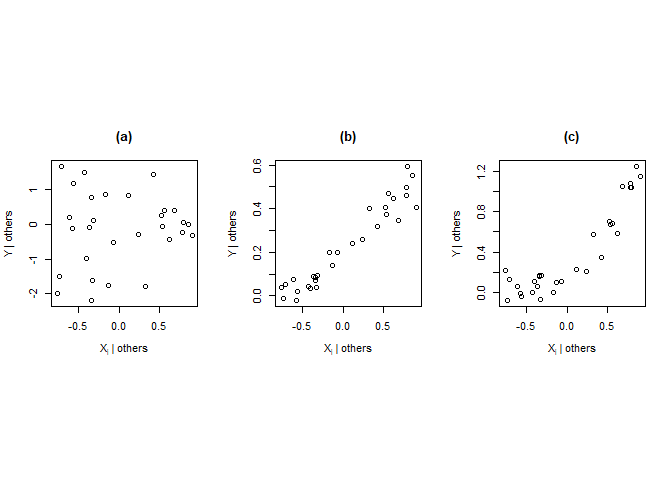

**Question:** What do the three plots tell us about our model?

From the **car** package, the `avPlot` function will produce an added-variable plot for a single regressor while the `avPlots` function will produce added-variable plots for one or more regressors.

The main arguments to the `avPlot` function are:

-   `model`: the fitted `lm` (or `glm`) object.
-   `variable`: the regressor for which to create an added-variable plot.
-   `id`: a logical value indicating whether unusual observations should be identified. By default, the value is `TRUE`, which means the 2 points with the largest residuals and the 2 points with the largest partial leverage are identified, though this can be customized.

The `avPlots` function replaces the `variable` argument with the `terms` argument.

The `terms` argument should be a one-sided formula to indicate the regressors for which we want to construct added-variable plots (one plot for each term).

We now create and interpret added-variable plots for the model regressing `bill_length_mm` on `body_mass_g` and `flipper_length_mm`.

We first load the **car** package.

In [ ]:
library(car)

We then create the added-variable plots for our fitted model.

In [ ]:
# create added-variable plots for all regressors in mlmod
avPlots(mlmod)

The blue line is the simple linear regression model that minimizes the RSS of the points.

**Question:** Which variable seems to have more explanatory power?

To create the added-variable plots for all regressors in the parallel lines model from `penguins` data, we use the fitted model:

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species})\\
&= 24.92 + 0.004 \mathtt{body\_mass\_g} + 9.92 D_C + 3.56 D_G,
\end{aligned}
$$

where $D_C$ and $D_G$ are indicator variables for the Chinstrap and Gentoo penguin species (Adelie penguins are the reference species).

In [ ]:
avPlots(lmodp)

**Questions:**

-   How should we interpret the relative strength of the linear relationships?
-   Is there any clustering apparent?

## Leverage Plots

It sometimes doesn’t make sense to talk about the effect of adding a single regressor when all of the other regressors are in the model.

-   When we add a categorical predictor to our model, we simultaneously add $K-1$ indicator variables as regressors; we do not add the indicator variables one-at-a-time.

We refer to regressors with this behavior as “multiple degrees-of-freedom terms”.

-   A categorical variable with 3 or more levels is the most basic multiple degrees-of-freedom term.
-   We could also consider regressors related to the interaction between two or more predictors, polynomial regressors, etc.

A *leverage plot* allows us to visualize the impact of multiple degrees-of-freedom terms. The interpretation of leverage plots is similar to the interpretation of added-variable plots, though we refer to “predictors” or “terms” instead regressors (which may be combined into one plot).

The `leveragePlot` and `leveragePlots` functions in the `car` package produce single or multiple leverage plots, respectively, with arguments similar to the `avPlot` and `avPlots` functions.

In [ ]:
leveragePlots(lmodp)

Interpretation:

-   The leverage plot for `body_mass_g` has a moderate linear relationship, so we expect `body_mass_g` to have moderate value in explaining the behavior of `bill_length_mm` after accounting for `species`
-   The points in the leverage plot for `species` have a moderately strong linear relationship, so we expect `species` to have moderate value in explaining the behavior of `bill_length_mm` after accounting for `body_mass_g`.

We next examine the leverage plot for the separate lines model fit to the `penguins` data. The fitted separate lines model is:

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}) \\
&= 26.99 + 0.003 \mathtt{body\_mass\_g} + 5.18 D_C - 0.25 D_G \\
&\quad + 0.001 D_C \mathtt{body\_mass\_g} + 0.0009 D_G \mathtt{body\_mass\_g},
\end{aligned}
$$

There are 6 estimated coefficients, but the fitted model has only 3 non-intercept terms. Recall the formula we fit for the separate lines model:

In [ ]:
# function call for separate lines model
lm(formula = bill_length_mm ~ body_mass_g + species + body_mass_g:species, data = penguins)

Thus, we have terms for `body_mass_g`, `species`, and the interaction term `body_mass_g:species`.

We use the code below to create the leverage plots:

In [ ]:
leveragePlots(lmods)

Interpretation:

-   The leverage plot for `body_mass_g` has a moderate linear relationship, so we expect `body_mass_g` to have moderate additional value in explaining the behavior of `bill_length_mm` after accounting for `species` and the interaction term `body_mass_g:species`.
    -   It is unlikely we would include the `body_mass_g:species` term in our model prior to including `body_mass_g`, so philosophically, this plot provides little useful information.
-   Interpreting the leverage plot for `species` has limited utility because the leverage plot includes the influence of the interaction term `body_mass_g:species`.
    -   We are unlikely to fit a model that includes the interaction term without also including the `species` term directly. Instead it makes more sense to judge the utility of adding `species` to the model regressing `bill_length_mm` on `body_mass_g` alone, which we already considered.
-   Examining the leverage plot for the interaction term `body_mass_g:species`, we see the points have only a weak linear relationship. Thus, we expect limited utility in adding the interaction term `body_mass_g:species` to the parallel lines regression model that regresses `bill_length_mm` on `body_mass_g` and `species`.

# Going deeper

## Orthogonality

Let

$$\mathbf{X}_{[j]}=[x_{1,j},\ldots,x_{n,j}]$$

denote the $n\times 1$ column vector of observed values for regressor the $j$th column of $\mathbf{X}$.

-   We can’t use the notation $\mathbf{x}_j$ because that is the $p\times 1$ vector of regressor values for the $j$th observation.

Regressors $\mathbf{X}_{[j]}$ and $\mathbf{X}_{[k]}$ are *orthogonal* if $\mathbf{X}_{[j]}^T \mathbf{X}_{[k]}=0$.

Let $\boldsymbol{1}_{n\times1}$ denote an $n\times 1$ column vector of 1s.

The definition of orthogonal vectors above implies that $\mathbf{X}_{[j]}$ is orthogonal to $\boldsymbol{1}_{n\times1}$ if

$$
\mathbf{X}_{[j]}^T \boldsymbol{1}_{n\times1} = \sum_{i=1}^n x_{i,j} = 0,$$

i.e., if the values in $\mathbf{X}_{[j]}$ sum to zero.

Let $\bar{x}_j = \frac{1}{n}\sum_{i=1}^n x_{i,j}$ denote the sample mean of $\mathbf{X}_{[j]}$ and $\bar{\mathbf{X}}_{[j]} = \bar{x}_j \boldsymbol{1}_{n\times 1}$ denote the column vector that repeats $\bar{x}_j$ $n$ times.

*Centering* $\mathbf{X}_{[j]}$ involves subtracting the sample mean of $\mathbf{X}_{[j]}$ from $\mathbf{X}_{[j]}$, i.e., $\mathbf{X}_{[j]} - \bar{\mathbf{X}}_{[j]}$.

Regressors $\mathbf{X}_{[j]}$ and $\mathbf{X}_{[k]}$ are *uncorrelated* if they are orthogonal after being centered, i.e., if

$$
(\mathbf{X}_{[j]} - \bar{\mathbf{X}}_{[j]})^T (\mathbf{X}_{[k]} - \bar{\mathbf{X}}_{[k]})=0.
$$

Note that the sample covariance between vectors $\mathbf{X}_{[j]}$ and $\mathbf{X}_{[k]}$ is

$$
\begin{aligned}
\widehat{\mathrm{cov}}(\mathbf{X}_{[j]}, \mathbf{X}_{[k]}) &= \frac{1}{n-1}\sum_{i=1}^n (x_{i,j} - \bar{x}_j)(x_{i,k} - \bar{x}_k) \\
 &= \frac{1}{n-1}(\mathbf{X}_{[j]} - \bar{\mathbf{X}}_{[j]})^T (\mathbf{X}_{[k]} - \bar{\mathbf{X}}_{[k]}).
\end{aligned}
$$

Thus, two centered regressors are orthogonal if their covariance is zero.

It is a desirable to have orthogonal regressors in our fitted model because they simplify estimating the relationship between the regressors and the response.

*If a regressor is orthogonal to all other regressors (and the column of 1s) in a model, adding or removing the orthogonal regressor from our model will not impact the estimated regression coefficients of the other regressors.*

Since most linear regression models include an intercept, we should assess whether our regressors are orthogonal to other regressors and the column of 1s.

We consider a simple example with $n=5$ observations to demonstrate how orthogonality of regressors impacts the estimated regression coefficients. In the code below:

-   `y` is a vector of response values.
-   `ones` is the column vector of 1s.
-   `X1` is a column vector of regressor values.
-   `X2` is a column vector of regressor values chosen to be orthogonal to `X1` but not to `ones`.

In the code below, we define vectors `y`, `X1`, and `X2`.

In [ ]:
y <- c(1, 4, 6, 8, 9)       # create an arbitrary response vector
X1 <- c(7, 5, 5, 7, 7)      # create regressor 1
X2 <- c(-1, 2, -3, 1, 5/7)  # create regressor 2 to be orthogonal to X1

Note that the `crossprod` function computes the cross product of two vectors or matrices, so that `crossprod(A, B)` computes $\mathbf{A}^T \mathbf{B}$, where the vectors or matrices must have the correct dimension for the multiplication to be performed.

The regressor vectors `X1` and `X2` are orthogonal since their cross product $\mathbf{X}_{[1]}^T \mathbf{X}_{[2]}$ is 0.

In [ ]:
crossprod(X1, X2)

In the code below, we regress `y` on `X1` without an intercept (`lmod1`).

-   The estimated coefficient for `X1` is $\hat{\beta}_1=0.893$.

In [ ]:
# y regressed on X1 without an intercept
lmod1 <- lm(y ~ X1 - 1)
coef(lmod1)

Next, we regress `y` on `X1` and `X2` without an intercept (`lmod2`).

-   The estimated coefficients for `X1` and `X2` are $\hat{\beta}_1=0.893$ and $\hat{\beta}_2=0.221$, respectively.
-   `X1` and `X2` are orthogonal, so the estimated coefficient for `X1` stays the same as in `lmod1`.

In [ ]:
# y regressed on X1 and X2 without an intercept
lmod2 <- lm(y ~ X1 + X2 - 1)
coef(lmod2)

We usually include an intercept coefficient (a columns of 1s as a regressor) in our model.

If the regressors are not orthogonal to the column of 1s in our $\mathbf{X}$ matrix, then the coefficients for the other regressors in the model will change when the regressors are added or removed from the model because they are not orthogonal to the column of 1s.

We create a column of 1s below.

In [ ]:
ones <- rep(1, 5)   # column of 1s

Neither `X1` nor `X2` is orthogonal with the column of ones.

In [ ]:
crossprod(ones, X1) # not zero, so not orthogonal

In [ ]:
crossprod(ones, X2) # not zero, so not orthogonal

We create `lmod3` by adding adding a column of ones to `lmod2` (i.e., if we include the intercept in the model).

The coefficients for both `X1` and `X2` change when going from `lmod2` to `lmod3` because these regressors are not orthogonal to the column of 1s.

Comparing the coefficients `lmod2` above and `lmod3`, $\hat{\beta}_1$ changes from $0.893$ to $0.397$ and $\hat{\beta}_2$ changes from $0.221$ to $0.279$.

In [ ]:
# y regressed on X1 and X2 with an intercept
lmod3 <- lm(y ~ X1 + X2)
coef(lmod3) # coefficients for lmod3

For orthogonality of our regressors to be most impactful, the model’s regressors should be orthogonal to each other and the column of 1s. In that context, adding or removing any of the regressors doesn’t impact the estimated coefficients of the other regressors.

In the code below, we define centered regressors `X3` and `X4` to be uncorrelated, i.e., `X3` and `X4` have sample mean zero and are orthogonal to each other.

In [ ]:
X3 <-  c(0, -1, 1, 0, 0) # sample mean is zero
X4 <- c(0, 0, 0, 1, -1)  # sample mean is zero
cov(X3, X4)              # 0, so X3 and X4 are uncorrelated and orthogonal

If we fit linear regression models with any combination of `ones`, `X3`, or `X4` as regressors, the associated regression coefficients will not change.

In [ ]:
coef(lm(y ~ 1))           # only column of 1s

In [ ]:
coef(lm(y ~ X3 - 1))      # only X3

In [ ]:
coef(lm(y ~ X4 - 1))      # only X4

In [ ]:
coef(lm(y ~ X3))          # 1s and X3

In [ ]:
coef(lm(y ~ X4))          # 1s and X4

In [ ]:
coef(lm(y ~ X3 + X4 - 1)) # X3 and X4

In [ ]:
coef(lm(y ~ X3 + X4))     # 1s, X3, and X4

Because all the regressors (and the intercept) are orthogonal to each other, adding or removing any regressor doesn’t impact the estimated coefficients for the other regressors in the model.

Thus, the estimated coefficients were $\hat{\beta}_{0}=5.6$, $\hat{\beta}_{3}=1.0$, $\hat{\beta}_{4}=-0.5$ when the relevant regressor was included in the model.

The easiest way to determine which vectors are orthogonal to each other and the intercept is to compute the cross product of the $\mathbf{X}$ matrix for the largest set of regressors we are considering. Consider the matrix of cross products for the columns of 1s, `X1`, `X2`, `X3`, and `X4`.

In [ ]:
crossprod(model.matrix(~ X1 + X2 + X3 + X4))

Consider the sequence of models below.

In [ ]:
coef(lm(y ~ 1))

The model with only an intercept has an estimated coefficient of $\hat{\beta}_{0}=5.6$.

If we add `X1` to the model with an intercept, then the intercept coefficient changes because the column of 1s and `X1` are not orthogonal.

In [ ]:
lmod4 <- lm(y ~ X1) # model with 1s and X1
coef(lmod4)

If we add `X2` to `lmod4`, we might think that only $\hat{\beta}_{0}$ will change because `X1` and `X2` are orthogonal to each other. However, because `X2` is not orthogonal to all of the other regressors in the model (`X1` and the column of 1s), both $\hat{\beta}_{0}$ and $\hat{\beta}_1$ will change. The easiest way to realize this is to look at `lmod2` above with only `X1` and `X2`. When we add the column of 1s to `lmod2`, both $\hat{\beta}_1$ and $\hat{\beta}_2$ will change because neither regressor is orthogonal to the column of 1s needed to include the intercept term.

In [ ]:
coef(lm(y ~ X1 + X2))

However, note that `X3` is orthogonal to the column of 1s and `X1`. Thus, if we add `X3` to `lmod4`, which includes both a column of 1s and `X1`, `X3` will not change the estimated coefficients for the intercept or `X1`.

In [ ]:
coef(lm(y ~ X1 + X3))

Additionally, since `X4` is orthogonal to the column of 1s, `X1`, and `X3`, adding `X4` to the previous model will not change the estimated coefficients for any of the other variables already in the model.

In [ ]:
coef(lm(y ~ X1 + X3 + X4))

Lastly, if we can partition our $\mathbf{X}$ matrix such that $\mathbf{X}^T \mathbf{X}$ is a block diagonal matrix, then none of the blocks of variables will affect the estimated coefficients of the other variables.

Define a new regressor `X5` below. `X5` is orthogonal to the column of 1s and `X1`, but not `X4`.

In [ ]:
X5 <- c(1, 0, 0, -1, 0) # orthogonal to ones, X1, not X4
# note block of 0s
crossprod(cbind(ones, X1, X4, X5))

Note the block of zeros in the lower left and upper right corners of the cross product matrix above.

-   The block containing `ones` and `X1` is orthogonal to the block containing `X4` and `X5`.

If we fit the model with only the column of 1s and `X1`, and then fit the model with the column of 1s, `X1`, `X4`, and `x5`, then the coefficients $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ are not impacted when `X4` and `X5` are added to the model.

In [ ]:
lm(y ~ X1)           # model with 1s and X1

In [ ]:
lm(y ~ X1 + X4 + X5) # model with 1s, X1, X4, x5

Similarly, $\hat{\beta}_{4}$ and $\hat{\beta}_{5}$ are not impacted when the column of 1s and `X1` are added to the model with `X4` and `X5`. See the output below.

In [ ]:
lm(y ~ X4 + X5 - 1)  # model with X4 and x5 only

In [ ]:
lm(y ~ X1 + X4 + X5) # model with 1s, X1, X4, x5